# Table of Contents
 <p>

In [2]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [3]:
def lin(a, b, x): 
    return a * x + b

# y = w0 + w1 * x

In [4]:
a=3.
b=8.

In [5]:
n=30
x = random(n)
y = lin(a,b,x)

In [6]:
x

array([ 0.3514,  0.4102,  0.1235,  0.3699,  0.1191,  0.8346,  0.4662,  0.7639,  0.5053,  0.6162,
        0.4006,  0.3668,  0.4595,  0.4059,  0.4567,  0.503 ,  0.786 ,  0.6043,  0.5378,  0.7   ,
        0.1548,  0.3394,  0.6993,  0.6319,  0.4929,  0.8978,  0.124 ,  0.4032,  0.8721,  0.183 ])

In [7]:
y

array([  9.0542,   9.2306,   8.3704,   9.1096,   8.3572,  10.5038,   9.3985,  10.2916,   9.5159,
         9.8485,   9.2019,   9.1005,   9.3784,   9.2176,   9.3701,   9.5091,  10.3581,   9.813 ,
         9.6133,  10.0999,   8.4644,   9.0182,  10.0979,   9.8958,   9.4787,  10.6934,   8.372 ,
         9.2096,  10.6163,   8.5491])

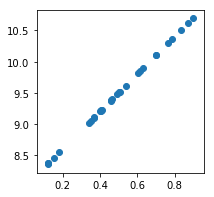

In [8]:
plt.scatter(x,y)

In [9]:
# sum of square error
def sse(y, y_pred): 
    return ((y - y_pred)**2).sum()

# define loss function
def loss(y, a, b, x): 
    return sse(y, lin(a, b, x))

def avg_loss(y, a, b, x): 
    return np.sqrt(loss(y, a, b, x) / n)

In [ ]:
def loss_(y, pred):
    return ((y - pred)**2).sum()

In [10]:
a_guess = -1.
b_guess = 1.
avg_loss(y, a_guess, b_guess, x)

8.9870

In [11]:
# learning rate
lr = 0.01

Calculate partial derivative respect to w0 w1
loss = (y - (w0 + w1 * x))**2 

1. d loss / d w0 = 2 * (y - (w0 + w1 * x)) * (-1) = 2 * (w0 + w1 * x - y)
2. d loss / d w1 = 2 * (y - (w0 + w1 * x)) * -x = 2 * x * (w0 + w1 * x - y)

d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [12]:
w0 = -1.
w1 = 1.

In [14]:
d1 = 2 * (w0 + w1 * x - y)
d1

array([-19.4055, -19.6407, -18.4939, -19.4794, -18.4762, -21.3384, -19.8646, -21.0554, -20.0212,
       -20.4647, -19.6026, -19.4674, -19.8379, -19.6234, -19.8268, -20.0122, -21.1441, -20.4174,
       -20.151 , -20.7999, -18.6192, -19.3576, -20.7972, -20.5277, -19.9716, -21.5911, -18.4959,
       -19.6128, -21.4884, -18.7321])

In [16]:
d2 = 2 * x * (w0 + w1 * x - y)
d2

array([ -6.8188,  -8.0563,  -2.2834,  -7.2045,  -2.1997, -17.8088,  -9.26  , -16.0833, -10.117 ,
       -12.6098,  -7.8537,  -7.1414,  -9.115 ,  -7.9642,  -9.0549, -10.0671, -16.62  , -12.3392,
       -10.8364, -14.5596,  -2.8822,  -6.5697, -14.5438, -12.9721,  -9.8439, -19.3842,  -2.2932,
        -7.9078, -18.74  ,  -3.4285])

In [23]:
def descent():    
    global w0, w1
    d1 = 2 * (w0 + w1 * x - y)
    d2 = 2 * x * (w0 + w1 * x - y)
    w0 -= lr * d1.mean()
    w1 -= lr * d2.mean()
    return w0, w1

In [24]:
w0, w1 = descent()

In [25]:
w0, w1

(-0.4164, 1.2891)

In [39]:
for i in range(1000):
    w0, w1 = descent()
    
print(w0, w1)

7.98211933632 3.03536753597


In [26]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [27]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

RuntimeError: No MovieWriters available!